In [17]:
SEED = 42

# Урок 1. Подготовка данных

### Задание - загрузите данные
- Импортируйте pandas
- Загрузите данные  из файла multi_data.csv функцией read_csv
- Выделите целевую переменную SalePrice в отдельную переменную из датафрейма
- Удалите целевую переменную из датафрейма методом drop


In [1]:
# Импортируйте pandas
import pandas as pd
# Загрузутие данные  из файла multi_data.csv
data = pd.read_csv('multi_data.csv')
# Выделите целевую переменную в отдельную переменную из датафрейма
y = data['SalePrice']
# Удалите целевую переменную из датафрейма
data = data.drop(labels=['SalePrice'], axis=1)

### Задание 

- Проверьте данные на пропуски: примените метод isna(), а затем просуммируйте методом sum() и выведите на печать
- Замените пропуски в столбце LotFrontage на медианное значение методом fillna. Аргументом метода подставьте data['LotFrontage'].median()

In [5]:
# Проверьте данные на пропуски
print(data.isna().sum())

# Замените пропуски на медианное значение
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Utilities          0
HouseStyle         0
YearBuilt          0
Foundation         0
TotRmsAbvGrd       0
KitchenAbvGr       0
MoSold             0
YrSold             0
SaleCondition      0
dtype: int64


### Задание - поиск числовых и кат переменных

- Проверьте, сколько уникальных категорий в каждом из столбцов
- Выделите числовые признаки в переменную var_num
- Выделите категориальные признаки в переменную var_cat
- Сделайте OHE категориальных признаков

In [41]:
# Проверьте, сколько уникальных категорий в каждом из столбцов
print(data.agg(lambda x: len(x.drop_duplicates())))

# Выделите числовые и категориальные признаки
var_num = ['LotFrontage', 'LotArea', 'MoSold', 'YrSold', 'TotRmsAbvGrd', 'YearBuilt', 'KitchenAbvGr']
var_cat = sorted(list(set(data.columns) - set(var_num)))

# Сделайте OHE категориальных признаков
data = pd.get_dummies(data, drop_first=True, columns=var_cat)

LotFrontage               110
LotArea                  1073
YearBuilt                 112
TotRmsAbvGrd               12
KitchenAbvGr                4
MoSold                     12
YrSold                      5
Foundation_CBlock           2
Foundation_PConc            2
Foundation_Slab             2
Foundation_Stone            2
Foundation_Wood             2
HouseStyle_1.5Unf           2
HouseStyle_1Story           2
HouseStyle_2.5Fin           2
HouseStyle_2.5Unf           2
HouseStyle_2Story           2
HouseStyle_SFoyer           2
HouseStyle_SLvl             2
MSZoning_FV                 2
MSZoning_RH                 2
MSZoning_RL                 2
MSZoning_RM                 2
SaleCondition_AdjLand       2
SaleCondition_Alloca        2
SaleCondition_Family        2
SaleCondition_Normal        2
SaleCondition_Partial       2
Street_Pave                 2
Utilities_NoSeWa            2
dtype: int64


### Задание - Шкалирование данных

- Импортируйте train_test_split
- Разделите данные на тестовую и тренировочную выборки
- Импортируйте StandardScaler
- Объвите шкалировщик
- Обучите и преобразуйте выборку


In [18]:
# Импортируйте train_test_split
from sklearn.model_selection import train_test_split

# Разделите данные на тестовую и тренировочную выборки
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=SEED)

In [15]:
# Импортируйте StandardScaler
from sklearn.preprocessing import StandardScaler

# Объвите шкалировщик
scaler = StandardScaler()

# Обучите и преобразуйте выборку
X_train[var_num] = scaler.fit_transform(X_train[var_num])

X_test[var_num] = scaler.transform(X_test[var_num])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Урок 2. Многоклассовая классификация

### Задание - распределение целевой переменной
- Посмотрите распределение целевого признака:
    - примените метод value_counts() к целевой переменной
    - следом примените метод plot(kind='bar')

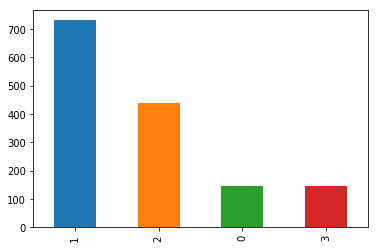

In [21]:
# Посмотрите распределение целевого признака
y.value_counts().plot(kind='bar')

### Задание - обучение лин модели
- Импортируйте функцию LogisticRegression
- Объявите логистическую регрессию
- Обучите логистическую регрессию
- Сделайте предсказание на тесте


In [25]:
# Импортируйте функцию LogisticRegression
from sklearn.linear_model import LogisticRegression

# Объявите логистическую регрессию
model_lg = LogisticRegression(multi_class='multinomial', random_state=SEED, solver='sag')

# Обучите логистическую регрессию
model_lg.fit(X_train, y_train)

# Сделайте предсказание на тесте
y_pred_lg = model_lg.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Задание - Accuracy

In [30]:
# Импортируйте метрику
from sklearn.metrics import accuracy_score
# Рассчитайте ее значение 
print('Accuracy:', accuracy_score(y_test, y_pred_lg))

Accuracy: 0.7191780821917808


### Задание - Precision

In [31]:
# Импортируйте метрику
from sklearn.metrics import precision_score

# Рассчитайте ее значение 

print('Precision_score_macro:', precision_score(y_test, y_pred_lg, average='macro'))
print('Precision_score_micro:', precision_score(y_test, y_pred_lg, average='micro'))

Precision_score_macro: 0.7076854746526009
Precision_score_micro: 0.7191780821917808


### Задание Recall

In [ ]:
# Импортируйте метрику
from sklearn.metrics import recall_score
# Рассчитайте ее значение 
print('recall_score_macro =', recall_score(y_test, y_pred_lg, average='macro'))
print('recall_score_micro =', recall_score(y_test, y_pred_lg, average='micro'))

### Задание F1-score

In [29]:
# Импортируйте метрику
from sklearn.metrics import f1_score

# Рассчитайте ее значение 
print('f1_macro =',f1_score(y_test, y_pred_lg, average='macro'))
print('f1_micro =',f1_score(y_test, y_pred_lg, average='micro'))

accuracy = 0.7191780821917808
f1_macro = 0.62505933383102
f1_micro = 0.7191780821917809
precision_score_macro = 0.7076854746526009
precision_score_micro = 0.7191780821917808
recall_score_macro = 0.5951052905445586
recall_score_micro = 0.7191780821917808


### Задание - случайный лес

- Импортируйте RandomForestClassifier
- Объявите случайный лес
- Обучите случайный лес
- Сделайте предсказания на тесте

In [33]:
# Импортируйте RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Объявите случайный лес
model_rfc = RandomForestClassifier(random_state=SEED)

# Обучите случайный лес
model_rfc.fit(X_train, y_train)

# Сделайте предсказания на тесте
y_pred_rfc = model_rfc.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Задание - метрики случайного леса
- Рассчитайте F1-score macro/micro
- Рассчитайте Precision_score_macro
- Рассчитайте Recall_score_macro

In [34]:
print('f1_macro =', f1_score(y_test, y_pred_rfc, average='macro'))
print('f1_micro =', f1_score(y_test, y_pred_rfc, average='micro'))
print('precision_score_macro =', precision_score(y_test, y_pred_rfc, average='macro'))
print('recall_score_macro =', recall_score(y_test, y_pred_rfc, average='macro'))

f1_macro = 0.5883747103608077
f1_micro = 0.6746575342465754
precision_score_macro = 0.6425082182774491
recall_score_macro = 0.5613995731033897


# Урок 3. Балансировка классов

### Задание - Балансировка классов
- Объявите логистическую регрессию с балансировкой весов классов
- Обучите логистическую регрессию
- Сделайте предсказание на тесте


In [35]:
# Объявите логистическую регрессию с балансировкой весов классов
model_lr = LogisticRegression(multi_class='multinomial', random_state=SEED, solver='sag', class_weight='balanced')

# Обучите логистическую регрессию
model_lr.fit(X_train, y_train)

# Сделайте предсказание на тесте
y_pred_lr = model_lr.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Задание - метрики сбалансированной логрегрессии
- Рассчитайте F1-score macro/micro
- Рассчитайте Precision_score_macro
- Рассчитайте Recall_score_macro

In [37]:
# Выведите метрики accuracy_score, f1_score (macro/micro), precision_score (macro), recall_score (macro)
print('f1_macro =',f1_score(y_test, y_pred_lr, average='macro'))
print('f1_micro =',f1_score(y_test, y_pred_lr, average='micro'))
print('precision_score_macro =', precision_score(y_test, y_pred_lr, average='macro'))
print('recall_score_macro =', recall_score(y_test, y_pred_lr, average='macro'))

f1_macro = 0.6398477938860446
f1_micro = 0.6541095890410958
precision_score_macro = 0.6166573167414661
recall_score_macro = 0.7125078317475151


### Задание - случайный лес с балансировкой
- Объявите случайный лес с балансировкой весов классов
- Обучите случайный лес
- Сделайте предсказание на тесте

In [39]:
# Объявите случайный лес с балансировкой весов классов
model_rfc = RandomForestClassifier(random_state=SEED, class_weight='balanced')

# Обучите случайный лес
model_rfc.fit(X_train, y_train)

# Сделайте предсказания на тесте
y_pred_rfc = model_rfc.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Задание - метрики сбалансированного случайного леса
- Рассчитайте F1-score macro/micro
- Рассчитайте Precision_score_macro
- Рассчитайте Recall_score_macro

In [40]:
print('f1_macro =',f1_score(y_test, y_pred_rfc, average='macro'))
print('f1_micro =',f1_score(y_test, y_pred_rfc, average='micro'))
print('precision_score_macro =', precision_score(y_test, y_pred_rfc, average='macro'))
print('recall_score_macro =', recall_score(y_test, y_pred_rfc, average='macro'))

f1_macro = 0.5854193863809497
f1_micro = 0.6712328767123288
precision_score_macro = 0.6260082399303957
recall_score_macro = 0.5626951299804605


Как мы можем видеть, баласировка весов увеличивает f1_macro, но уменьшает f1_micro. Это логично, так как f1_macro усредняет точность по всем классом по отдельности (то есть мы увеличили кол-во правильных предсказаний среди редких классов). А f1_micro, как мы выяснили считает долю правильно указанных классов (то есть модели было удобнее не обучаться на редких классов). Балансировка весов заставляет модель учить и редкие классы (путем ухудшения предсказания частых классов).